In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [78]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


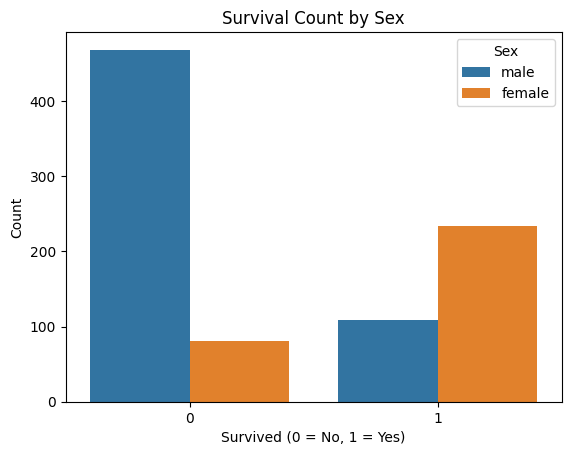

In [81]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

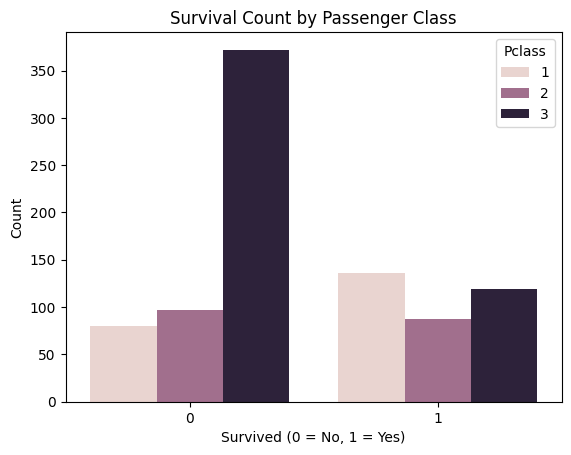

In [82]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

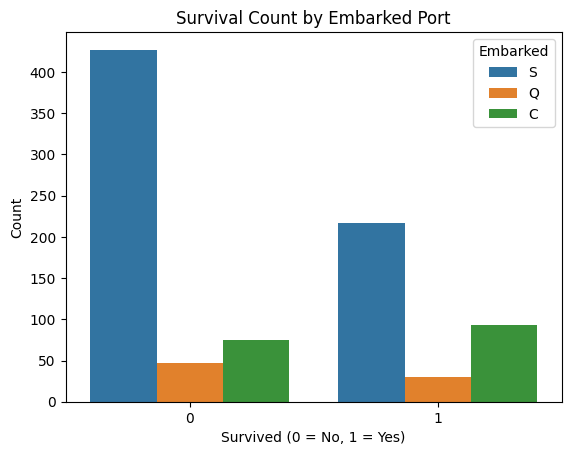

In [83]:
sns.countplot(x='Survived', hue='Embarked', data=train_data)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

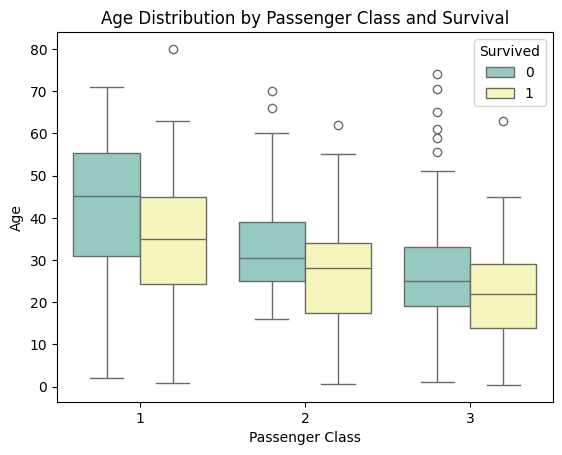

In [84]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data, palette='Set3')
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

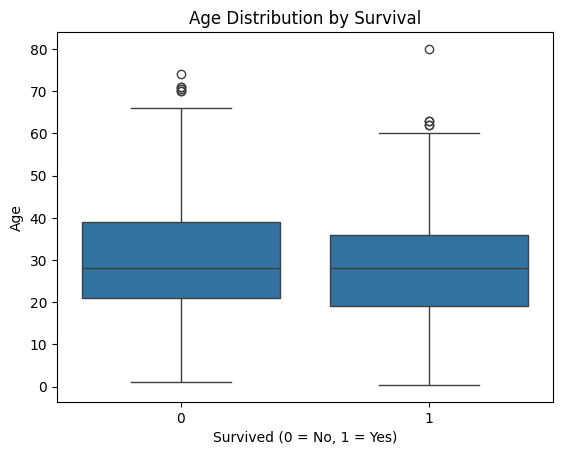

In [85]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

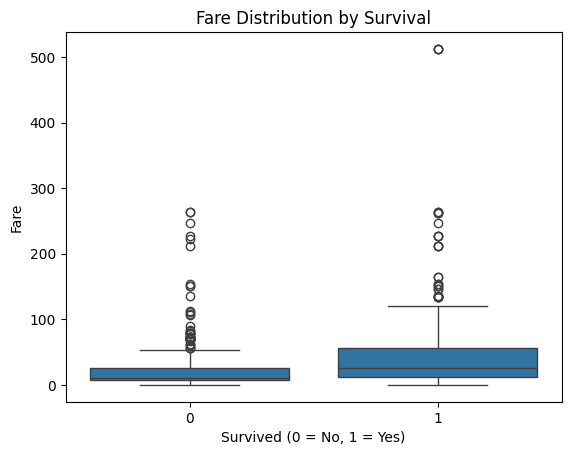

In [86]:
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

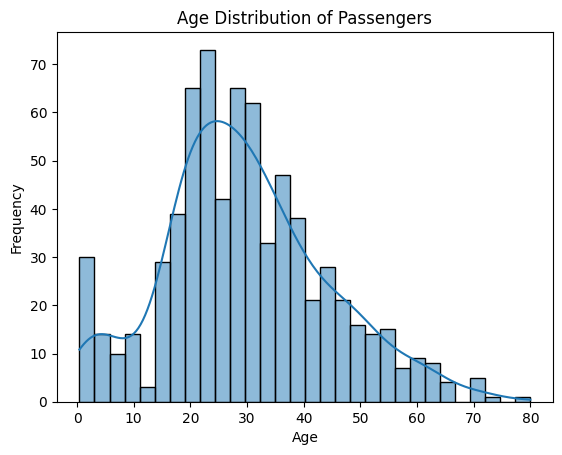

In [87]:
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

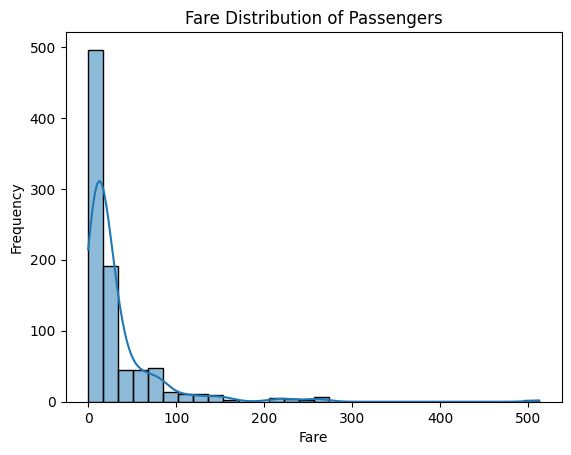

In [88]:
sns.histplot(train_data['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [89]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

In [90]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [91]:
train_data['Sex'] = train_data['Sex'].map(lambda x: 1 if x == 'female' else 0)
test_data['Sex'] = test_data['Sex'].map(lambda x: 1 if x == 'female' else 0)

In [92]:
pclassmap = {1: 3, 2: 2, 3: 1}
train_data['Pclass'] = train_data['Pclass'].map(pclassmap)
test_data['Pclass'] = test_data['Pclass'].map(pclassmap)

In [93]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [94]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,1,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,1,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True


In [95]:
train_data['HasCabin'] = train_data['Cabin'].notnull().astype(int)
test_data['HasCabin'] = test_data['Cabin'].notnull().astype(int)

In [96]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])

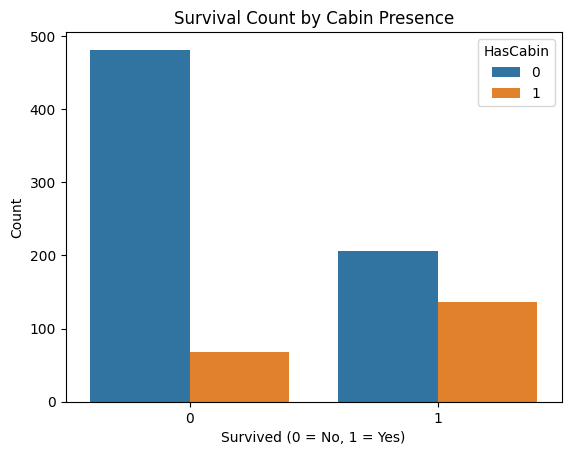

In [97]:
sns.countplot(x='Survived', hue='HasCabin', data=train_data)
plt.title('Survival Count by Cabin Presence')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

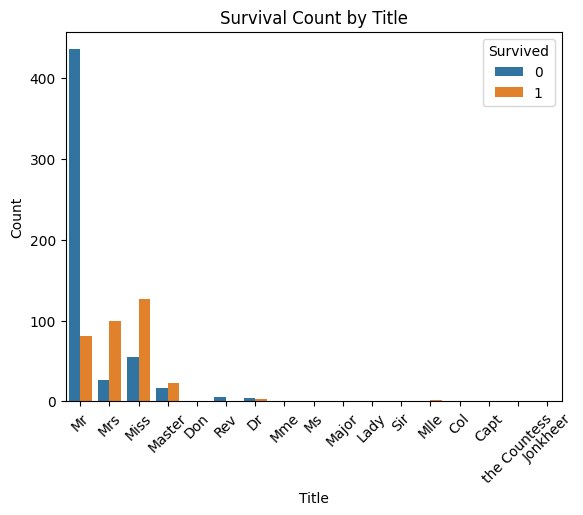

In [98]:
sns.countplot(x='Title', data=train_data, hue='Survived')
plt.title('Survival Count by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [99]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [100]:
title_mapping = {
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Ms': 'Miss',
        'Mlle': 'Miss',
        'Master': 'Master',
        'Mme': 'Mrs',
        'Don': 'Mr',
        'Dr': 'Officer',
        'Rev': 'Officer',
        'Col': 'Officer',
        'Major': 'Officer',
        'Capt': 'Officer',
        'Sir': 'Royalty',
        'Lady': 'Royalty',
        'Jonkheer': 'Royalty',
        'the Countess': 'Royalty',
    }

train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

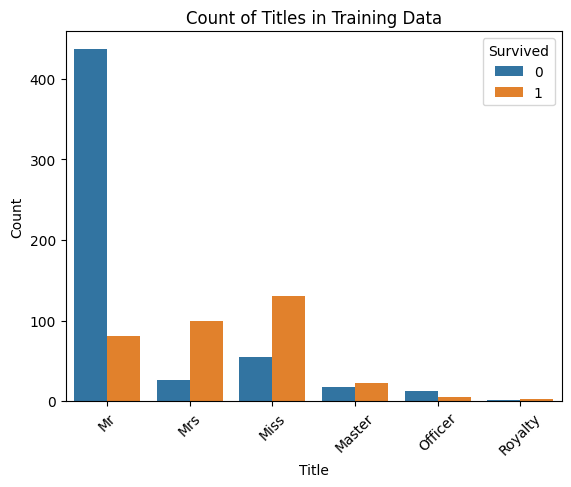

In [101]:
sns.countplot(x='Title', data=train_data, hue='Survived')
plt.title('Count of Titles in Training Data')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [102]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,HasCabin,Title
0,1,0,1,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True,0,Mr
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False,1,Mrs
2,3,1,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,0,Miss
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True,1,Mrs
4,5,0,1,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True,0,Mr


In [103]:
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)

In [104]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [105]:
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [106]:
bool_cols = train_data.select_dtypes(include='bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)
test_data[bool_cols] = test_data[bool_cols].astype(int)

In [107]:
X = train_data.drop(columns=['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
y = train_data['Survived']
X_test = test_data.drop(columns=['PassengerId', 'Survived','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])

In [120]:
X_test.isnull().sum()

Pclass           0
Sex              0
Age              0
Fare             0
Embarked_Q       0
Embarked_S       0
HasCabin         0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
FamilySize       0
dtype: int64

In [108]:
X.shape, X_test.shape

((891, 13), (418, 13))

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,HasCabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize
331,3,0,45.5,28.5000,0,1,1,0,1,0,0,0,1
733,2,0,23.0,13.0000,0,1,0,0,1,0,0,0,1
382,1,0,32.0,7.9250,0,1,0,0,1,0,0,0,1
704,1,0,26.0,7.8542,0,1,0,0,1,0,0,0,2
813,1,1,6.0,31.2750,0,1,0,1,0,0,0,0,7


In [115]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S', 'HasCabin',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'FamilySize'],
      dtype='object')

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# model = XGBClassifier(use_label_encoder=False, 
#                       eval_metric='logloss',
#                       n_estimators=100,
#                       max_depth=3,
#                       learning_rate=0.1,
#                       subsample=0.8,
#                       colsample_bytree=0.8)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Validation Accuracy: {accuracy:.4f}')



Validation Accuracy: 0.8324


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [None, 5, 10],            
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt', 'log2', None] 
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8101


In [123]:
y_pred_test = best_model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_test
})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
